# Virat Kohli : Batting Analysis (2008-2018):
**Virat Kohli** is an Indian cricketer. He was born in Delhi, India on November 5, 1988. Virat is the first player in ICC cricket history to win all 3 ICC awards in a single year- ICC ODI player of the year, ICC Test player of the year and ICC Player of the year award in 2018.

<img src="https://images.thequint.com/thequint%2F2018-01%2F5d369107-8477-4216-a39d-ad806e1d3a0c%2FVirat-century.jpg?rect=0%2C0%2C4650%2C2616&auto=format%2Ccompress&fmt=webp&w=700&dpr=1.0.jpg" width="500" height="500" />

**Born**: November 5, 1988, Delhi, India

**Team**: India national cricket team

**Sport**: Cricket

**Nationality**: India

**Data Dictionary**
1. RunsScored : Number of Runs scored by Kohli in the match.
2. BallsFaced : Number of Balls Faces by Kohli in the match.
3. BattingPosition : Batting position is Virat Kohli's position on the batting order.
4. Dismissal : How Kohli got out in the match or not out. Caught, NO: Not Out, Bowled, Run out, LBW, Stumped, Hit wicket.
5. Inning : An innings is one of the divisions of a match during which one team takes its turn to bat. Two 1st inning or 2nd inning.
6. Opposition : Name of the Opposition team.
7. Year : Year in which the match was played.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [81]:
# Read Bastman details file

mydata = pd.read_csv('Batsman.csv')

In [82]:
# View first 5 rows

mydata.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [83]:
#Checking Info

mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


In [84]:
#Shape of the data

mydata.shape

(208, 7)

In [85]:
#Null Value Check

mydata.isnull().sum()

RunsScored         0
BallsFaced         0
BattingPosition    0
Dismissal          0
Inning             0
Opposition         0
Year               0
dtype: int64

In [86]:
# Descriptive summary

mydata.describe()

,RunsScored,BallsFaced,BattingPosition,Inning,Year
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,49.192308,52.961538,3.264423,1.567308,2013.240385
std,43.797641,39.850548,0.781602,0.496644,2.750477
min,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,10.750000,18.000000,3.000000,1.000000,2011.000000
50%,35.000000,46.500000,3.000000,2.000000,2013.000000
75%,81.250000,83.250000,3.000000,2.000000,2015.000000
max,183.000000,159.000000,7.000000,2.000000,2018.000000


In [87]:
# Descriptive summary for Numeric and Categorical variables

mydata.describe(include = ['object'])

,Dismissal,Opposition
count,208,208
unique,7,12
top,Caught,Sri Lanka
freq,121,45


## Q-1 What is the percentage for Kohli being Not Out.
**Make a Pie Chart displaying the distribution of Dismissals**

In [89]:
mydata['Dismissal'].value_counts().index

Index(['Caught', 'NO', 'Bowled', 'LBW', 'Run out', 'Stumped', 'Hit wicket'], dtype='object', name='Dismissal')

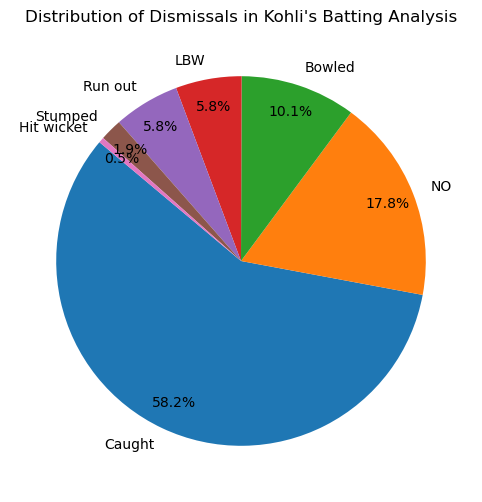

In [90]:
# Get the count of each dismissal type in the 'Dismissal' column
dismissal_counts = mydata['Dismissal'].value_counts()

# Set up the figure size for the pie chart
plt.figure(figsize=(8, 6))

# Create the pie chart with adjustments for spacing:
# - 'pctdistance' adjusts the distance of percentage labels from the center
# - 'labeldistance' moves the labels further out
plt.pie(
    dismissal_counts, 
    labels=dismissal_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    pctdistance=0.85,  # Moves the percentage labels outwards
    labeldistance=1.1  # Moves the slice labels outwards
)

# Add a title to the pie chart
plt.title("Distribution of Dismissals in Kohli's Batting Analysis")

# Show the pie chart
plt.show()

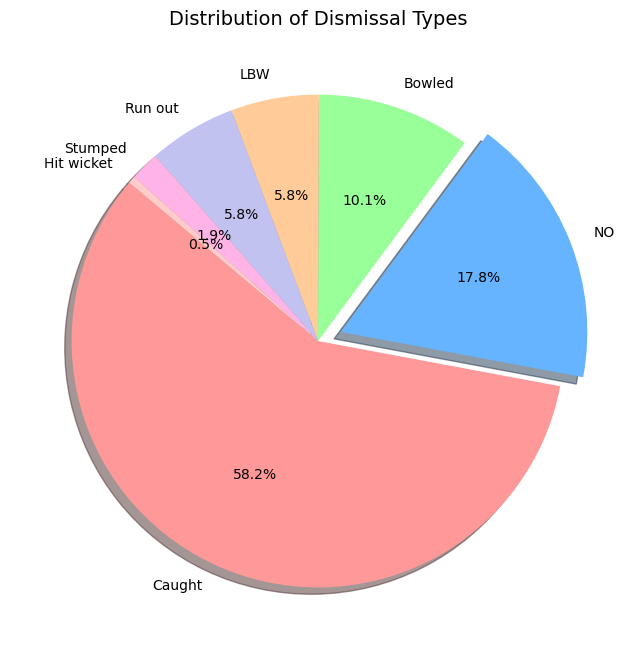

In [91]:
# Define colors for each slice of the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ffcccb']

# Create a new figure and axis for the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Generate the pie chart
ax.pie(
    mydata['Dismissal'].value_counts(), 
    labels=mydata['Dismissal'].value_counts().index, 
    autopct='%1.1f%%', 
    colors=colors,  # Colors for each slice
    explode=(0, 0.1, 0, 0, 0, 0, 0),  # Slightly separate one slice (optional)
    shadow=True,  # Adds a shadow effect
    startangle=140,  # Starting angle for the pie chart
    textprops={'fontsize': 10},  # Font size for the labels
)

# Set the title of the chart
ax.set_title('Distribution of Dismissal Types', fontsize=14)

# Display the chart
plt.show()

## Q-2 Find the number of times when kohli scored less than or equal to 7 runs?

In [93]:
mydata['RunsScored']

0       12
1       37
2       25
3       54
4       31
      ... 
203    140
204    157
205    107
206     16
207     33
Name: RunsScored, Length: 208, dtype: int64

In [94]:
# Count the number of scores that are less than or equal to 7
low_scores_count = mydata['RunsScored'] <= 7  # Creates a boolean series with True where score <= 7
low_scores_count.sum()  # Sums up True values (True = 1, False = 0), giving the count

# Display the result
print("Number of times Kohli scored 7 or less runs:", low_scores_count.sum())

Number of times Kohli scored 7 or less runs: 40


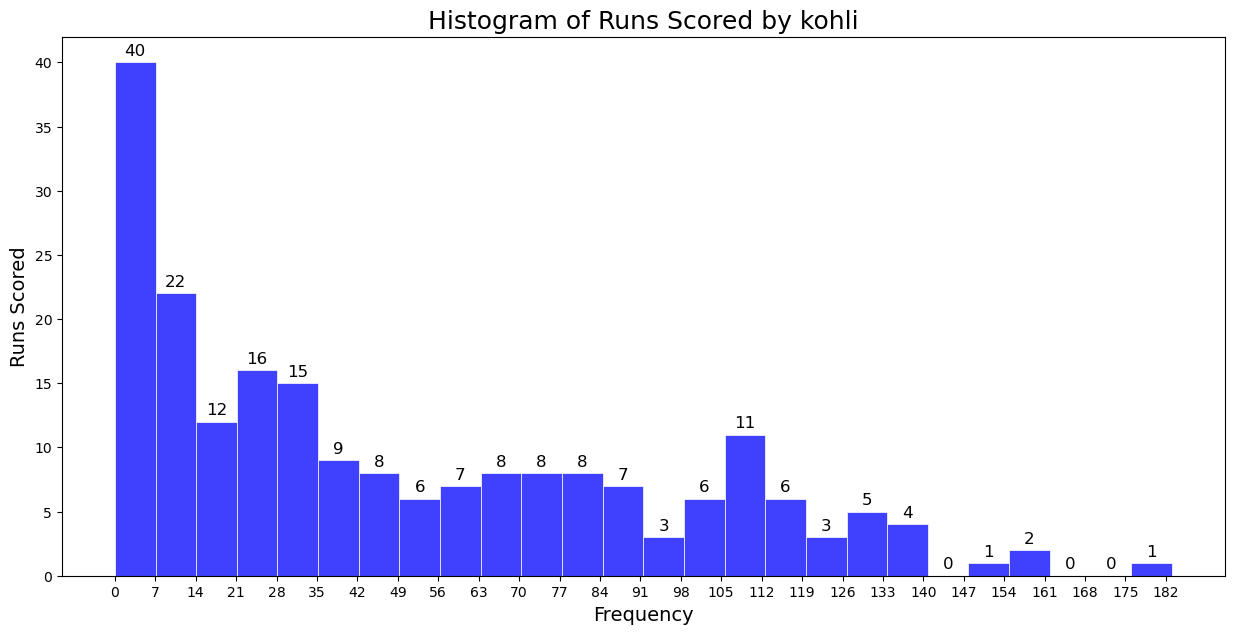

In [95]:
plt.figure(figsize = (15, 7))

ax = sns.histplot(mydata['RunsScored'], 
             bins = 26, 
             kde = False, 
             color = 'b', 
             linewidth = 0.5, 
             edgecolor = 'white')

#Add title and labels:
ax.set_title('Histogram of Runs Scored by kohli', fontsize = 18)
ax.set_ylabel('Runs Scored', fontsize = 14)
ax.set_xlabel('Frequency', fontsize = 14)

plt.xticks(np.arange(0,183, 7))

#Add the annotations on top of each bars:
for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(f'{int(height)}',
    xy = (patch.get_x() + patch.get_width() / 2, height),
    xytext = (0, 5),
    textcoords = 'offset points',
    ha = 'center', 
    fontsize = 12,
    color = 'black')

plt.show()

## Q.4  Boxplot to represent the middle50% of Runs Scored
#tell the IQR( Inter Quartile Range) middle 50% of runs scored by Kohli?
[Hint: Middle 50% Range= Q3(75%)-Q1(25%)]

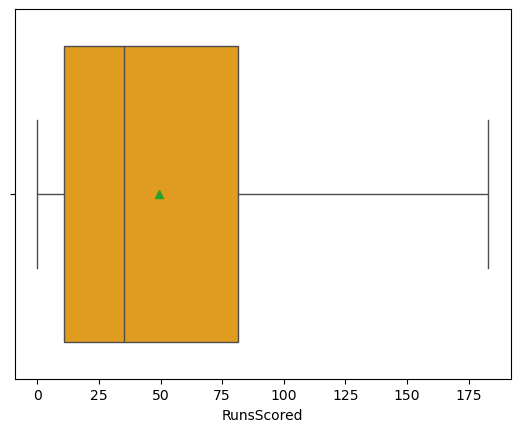

In [97]:
sns.boxplot(x = 'RunsScored', color = 'Orange', data = mydata, showmeans = True)

plt.show()

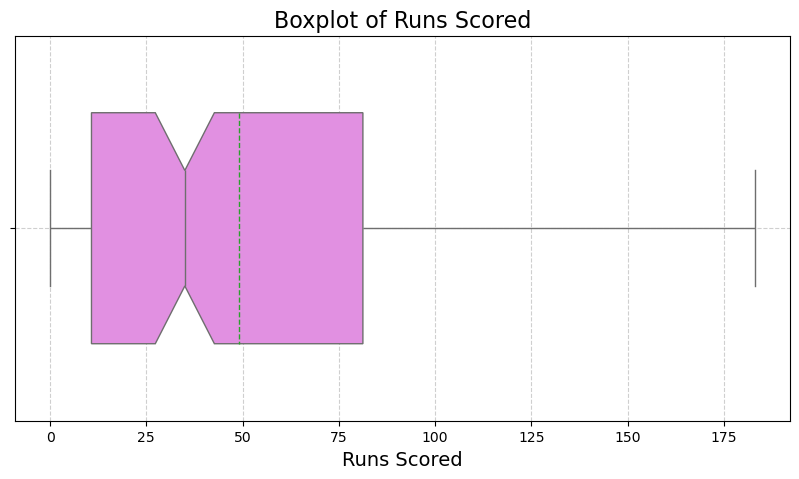

In [98]:
plt.figure(figsize = (10, 5))

sns.boxplot(x = 'RunsScored', 
            color = 'violet', 
            data = mydata, 
            showmeans = True,
           meanline = True,
           notch = True, # It's the cut shown in the boxplot at the median. 
           width = 0.6,
           flierprops = dict(marker = 'o', markerfacecolor = 'r', markersize = 8, linestyle = 'none', markeredgecolor = 'r'))


#Add title:
plt.title('Boxplot of Runs Scored', fontsize = 16)
plt.xlabel('Runs Scored', fontsize = 14)

#Add a grid line:
plt.grid(True, linestyle = '--', alpha = 0.6)

plt.show()

In [99]:
mydata['RunsScored'].median()

35.0

## Q. What is the best way that the opposition team bowlers can get Kohli out?

How Kohli got dismissed most of the times?

[Hint: Use countplot]

In [101]:
mydata.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


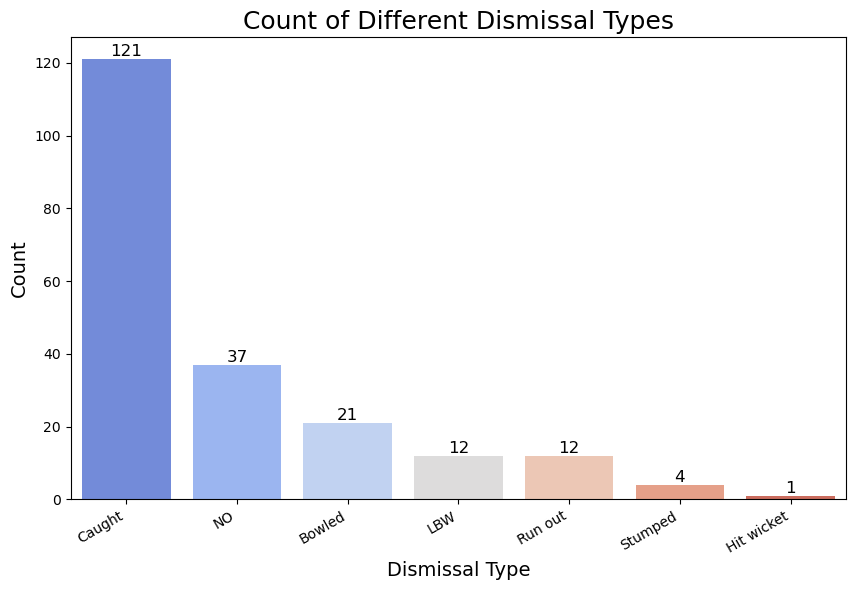

In [102]:
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'Dismissal', data = mydata, palette = 'coolwarm', order = mydata['Dismissal'].value_counts().index)

#Add the titles and labels:
ax.set_title('Count of Different Dismissal Types', fontsize = 18)
ax.set_xlabel('Dismissal Type', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

#Add annotations i.e counts on top of each bar:
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
               (p.get_x() + p.get_width() / 2, p.get_height()),
               ha = 'center', va = 'bottom', fontsize = 12, color = 'black')

#Rotate x-axis labels :
plt.xticks(rotation = 30, ha = 'right')

plt.show()

## Q. Against which opposition team Kohli has played the most in his career?
[Hint: Use Countplot]

In [104]:
mydata.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


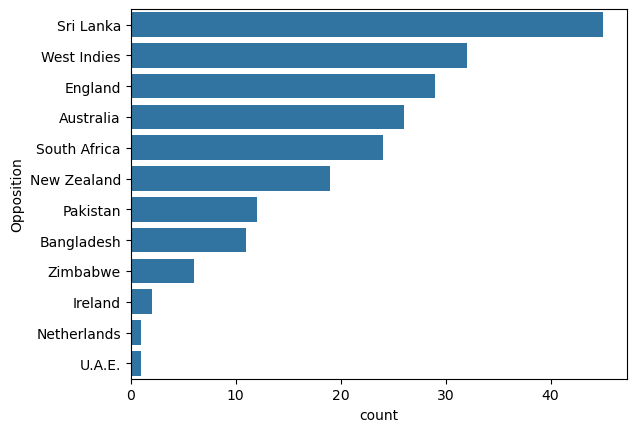

In [105]:
sns.countplot(y = mydata['Opposition'], order = mydata['Opposition'].value_counts().index)
plt.show()

To Make the Plot Look More Attractive:

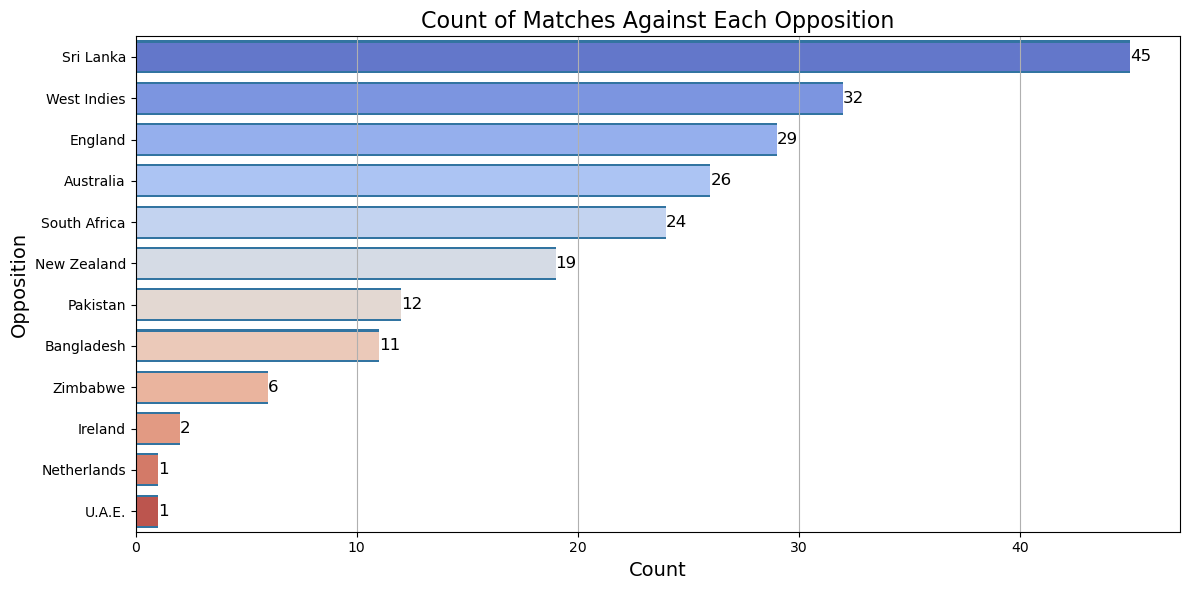

In [107]:
plt.figure(figsize = (12, 6))

ax = sns.countplot(y = mydata['Opposition'], order = mydata['Opposition'].value_counts().index)

#Add titles & labels:
ax.set_title('Count of Matches Against Each Opposition', fontsize = 16)
ax.set_xlabel('Count', fontsize = 14)
ax.set_ylabel('Opposition', fontsize = 14)

#Add annotations, i.e counts on top of the patches:
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
               (p.get_width(), p.get_y() + p.get_height() / 2), # this step differs in annotation, as this plot consists details in y axis
               ha = 'left', va = 'center', fontsize = 12, color = 'black')

#Add grid lines for better readability:
ax.xaxis.grid(True)

#Rotate y-axis labels for better readability:
plt.yticks(rotation = 0)

sns.countplot(y = 'Opposition',
             data = mydata,
             order = mydata['Opposition'].value_counts().index,
             palette = 'coolwarm',
             width = 0.7)

plt.tight_layout()
plt.show()

## Q. Find out some interesting dismissal patterns in Kohli's career againsts the oppositions.
[Hint: Stacked Bar Plot]

In [109]:
mydata.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


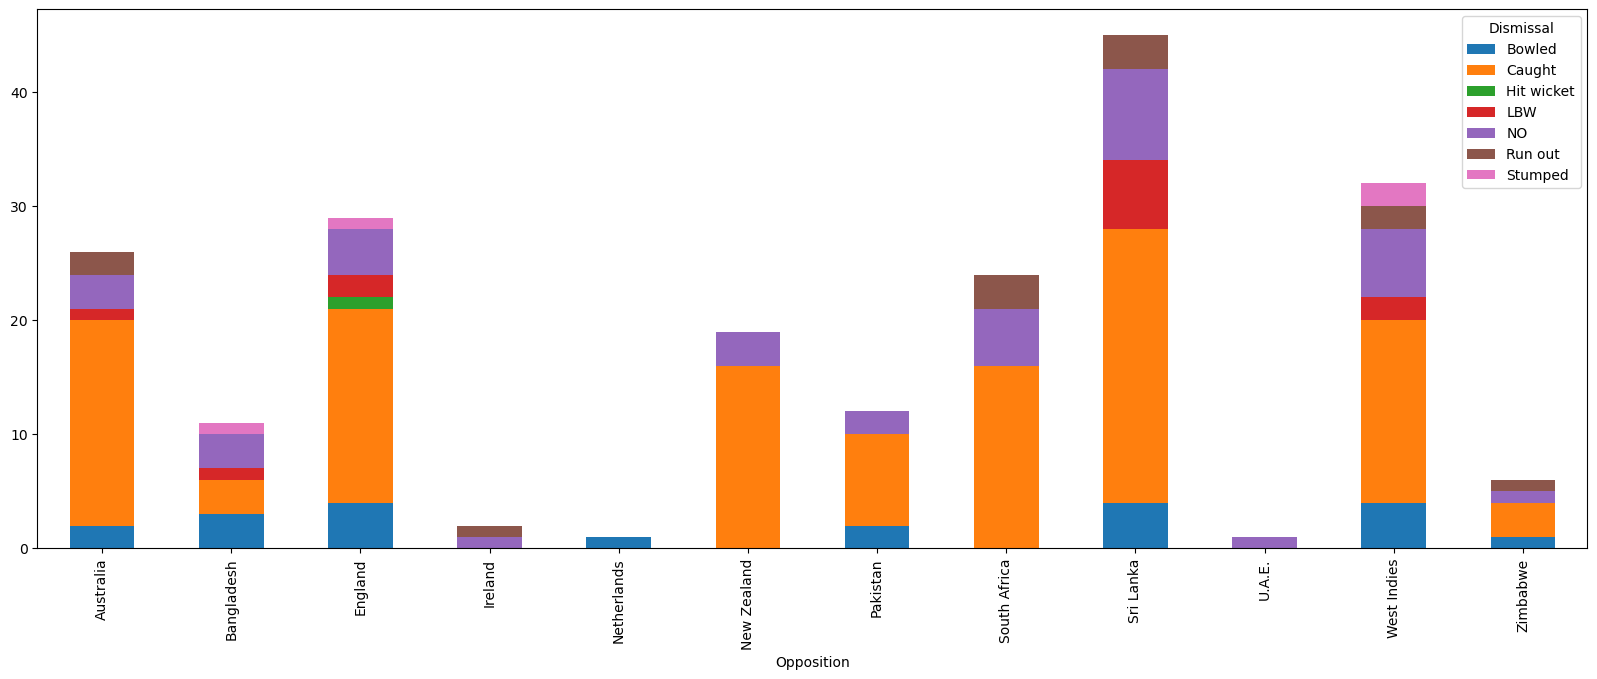

In [110]:
ct = pd.crosstab(mydata['Opposition'], mydata['Dismissal']) # Creates a cross-tabulation (frequency table) of dismissals by opposition

ct.plot.bar(stacked = True, figsize = (20 , 7)) # Plots a stacked bar chart

plt.show()

# To make it look more attractive with proper neat looking color combinations: 

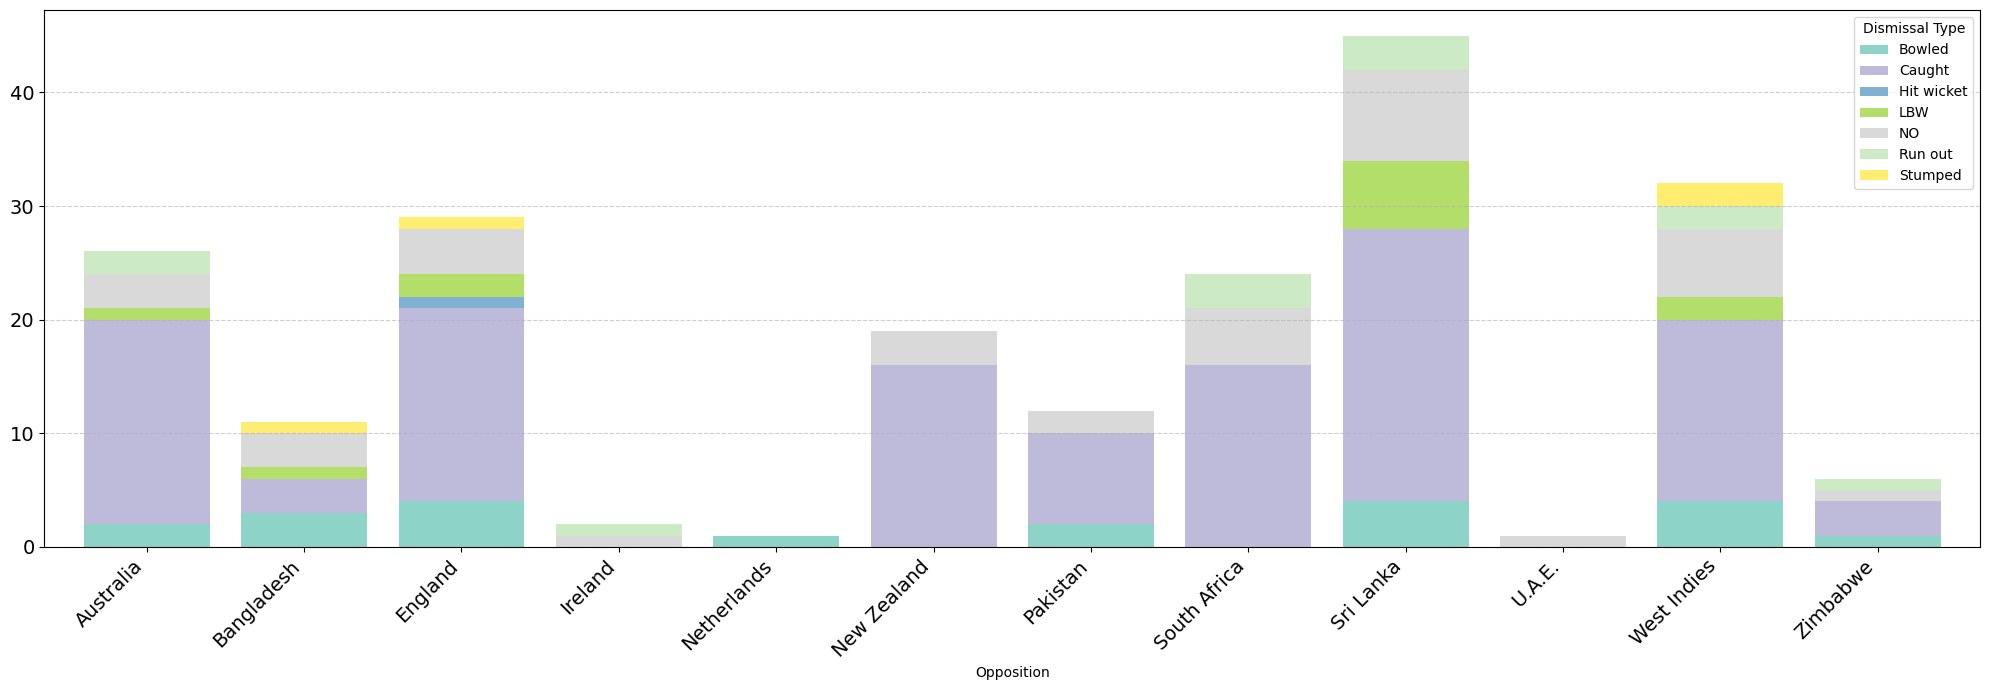

In [112]:

ct = pd.crosstab(mydata['Opposition'], mydata['Dismissal'])

ct.plot.bar(stacked = True, figsize = (20 , 7), colormap = 'Set3', width = 0.8)

#Add titles and lables:
ax.set_title('Dismissal Count')
ax.set_xlabel('Opposition')
ax.set_ylabel('Count of Dismissals')

plt.legend(title = 'Dismissal Type') 

plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)

plt.xticks(fontsize = 14, rotation = 45, ha = 'right')
plt.yticks(fontsize = 14)


plt.tight_layout()
plt.show()

## Q. Which opposition has Kohli scored most runs against? Find the median score against different oppositions and use a boxplot to represent it?
[Hint: Use barchart & BoxPlot]

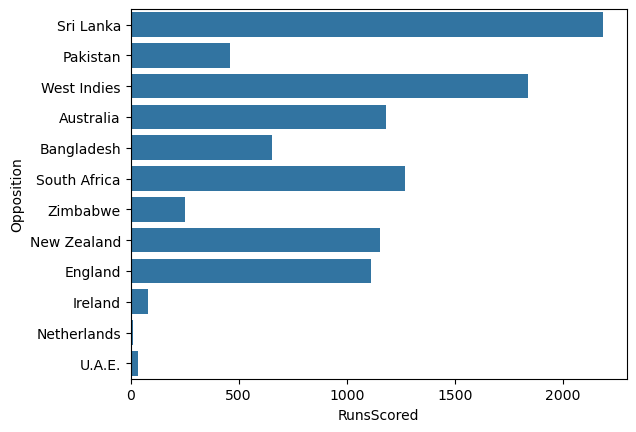

In [114]:
sns.barplot(x = 'RunsScored', y = 'Opposition', estimator = np.sum, data = mydata, ci = None)

plt.show()

Exercise: <br>
1. Bars are desc order sorted
2. Better color
3. Annotate on top of each bars

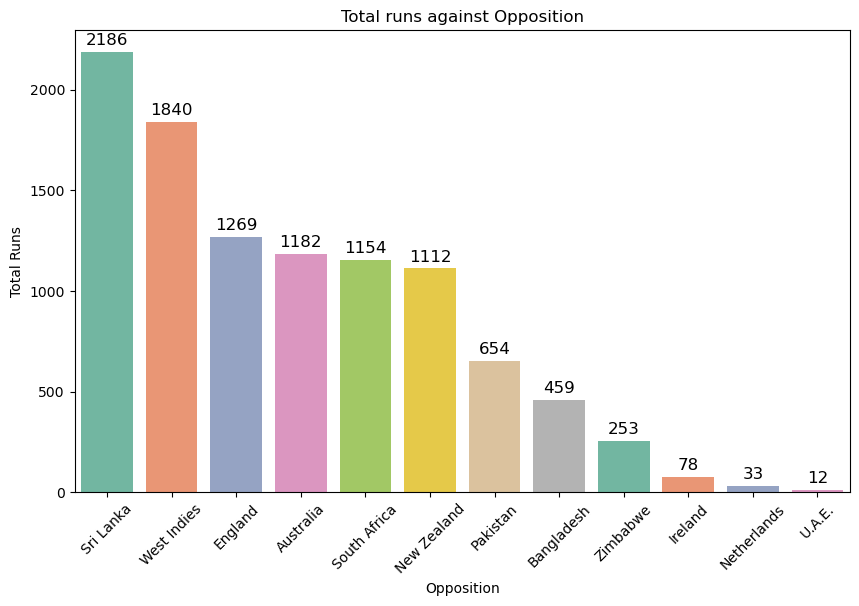

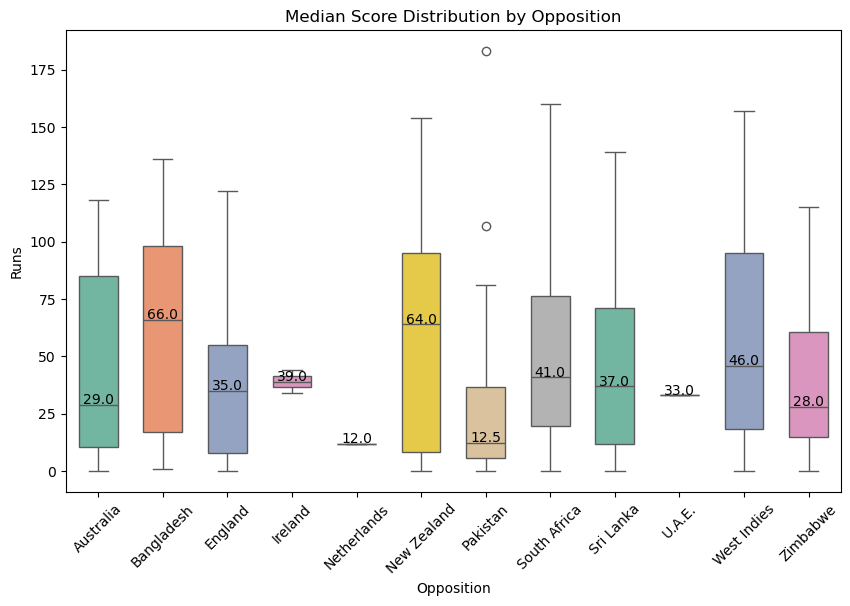

In [116]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x=mydata['Opposition'].value_counts().index, 
                 y=mydata.groupby('Opposition')['RunsScored'].sum().sort_values(ascending=False), 
                 palette='Set2')
ax.set_title('Total runs against Opposition')
ax.set_xlabel('Opposition')
ax.set_ylabel('Total Runs')
plt.xticks(rotation = 45)

for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(f'{int(height)}',
    xy = (patch.get_x() + patch.get_width() / 2, height),
    xytext = (0, 5),
    textcoords = 'offset points',
    ha = 'center',
    fontsize = 12,
    color = 'black')

plt.show()

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Opposition', y='RunsScored', data=mydata, 
                 order=mydata.groupby('Opposition')['RunsScored'].median().index,
                 meanline = True, width = 0.6, palette ='Set2')
ax.set_title('Median Score Distribution by Opposition')
ax.set_xlabel('Opposition')
ax.set_ylabel('Runs')
plt.xticks(rotation=45)

medians = mydata.groupby(['Opposition'])['RunsScored'].median().values
positions = range(len(medians))  # Position of the boxes

# Loop through each position and annotate
for p, median,in zip(positions, medians):
    # Annotate the median
    plt.text(p, median + 2, f'{median:.1f}', color='black', ha='center', va='center')

plt.show()

## Q. Compare the runs scored by Kohli in 1st innings vs the 2nd innings.
[Hint: Use Boxplot]

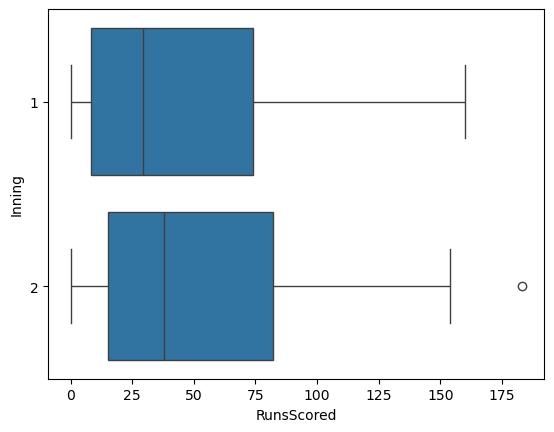

In [118]:
sns.boxplot(x = 'RunsScored', y = 'Inning', data = mydata, orient = 'h') # Show runs scored through boxplot in horizontal axis

plt.show()

# Combination of both boxplot and stripplot

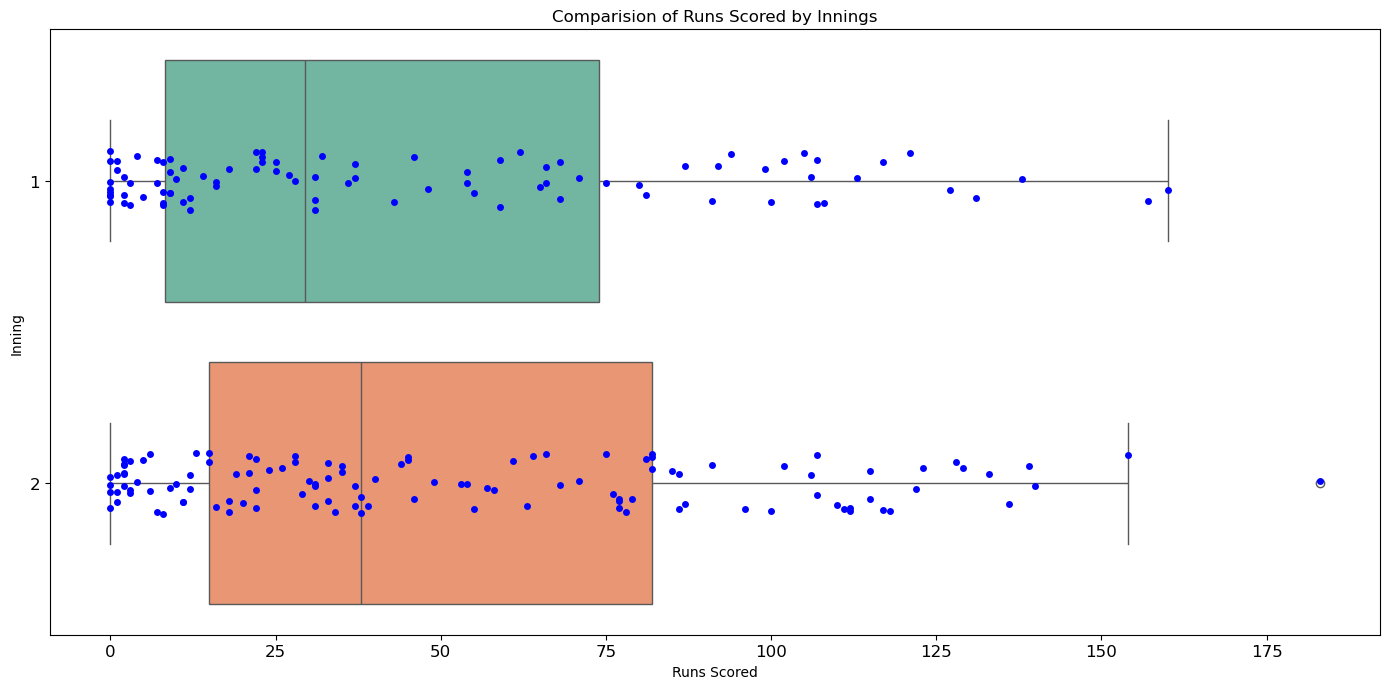

In [120]:
plt.figure(figsize = (14, 7))

sns.boxplot(x = 'RunsScored', y = 'Inning', data = mydata, orient = 'h', palette = 'Set2')

sns.stripplot(x = 'RunsScored', y = 'Inning', data = mydata, orient = 'h', color = 'Blue')

plt.title('Comparision of Runs Scored by Innings')
plt.xlabel('Runs Scored')
plt.ylabel('Inning')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.tight_layout()
plt.show()

## Q. Pre and Post transformation comparison

**It is well known that Kohli started taking fitness much more seriously post an ordinary IPL in 2012. He changed his training regime and eating habits completely, realising the need to transform his body to survive the rigours of playing all three formats.**
<img src="https://cdn.wisden.com/wp-content/uploads/2020/07/Untitled-design-47.png" width="500" height="500" />
<img src= "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSskALcVu6o9iI-7Q_rsehBkQ4PpDN6IAjWwA&usqp=CAU" width="500" height="500" />

**Kohli says it was the absence of fear or respect for him in the opposition's eye that has forced him to change his work ethic
Kohli revealed how working on his fitness has lifted his game after coming back from the Australian tour in 2012
While he considers his idol Tendulkar's skills as a cricketer in a different league, his is a case of pure hard work**

Adding a column giving true for those rows which represent post transformation 

In [123]:
mydata['post_transform'] = mydata['Year'] > 2012

## Use a Boxplot to compare the runs Scored before and after transformation


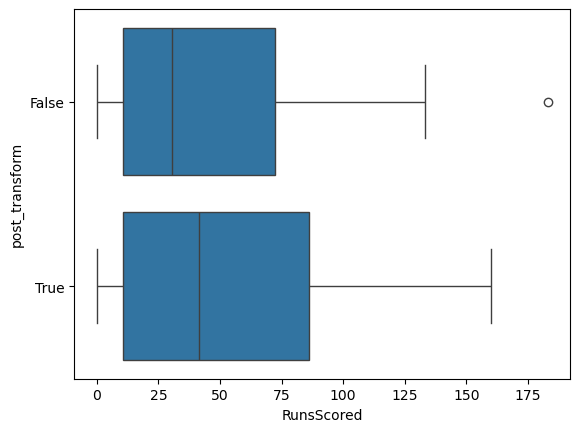

In [125]:
sns.boxplot(x = 'RunsScored', y = 'post_transform', data = mydata, orient = 'h')
plt.show()

Let's work: <br>
1. Print the Median value in the boxplot
2. Add stripplot in this plot

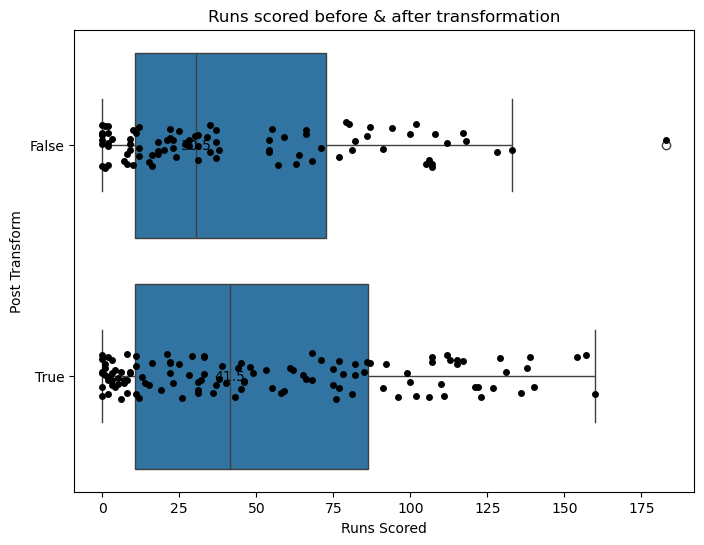

In [127]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'RunsScored', y = 'post_transform', data = mydata, orient = 'h')

sns.stripplot(x = 'RunsScored', y = 'post_transform', data = mydata, orient = 'h', color = 'black')

plt.title('Runs scored before & after transformation')
plt.xlabel('Runs Scored')
plt.ylabel('Post Transform')

medians = mydata.groupby('post_transform')['RunsScored'].median()

for i, category in enumerate(medians.index):
    median_value = medians[category]
    plt.text(median_value, i, f'{median_value:.1f}', ha='center', va='center', color='black')

plt.show()

## Use a Boxplot to compare the Runs Scored before and after transformation

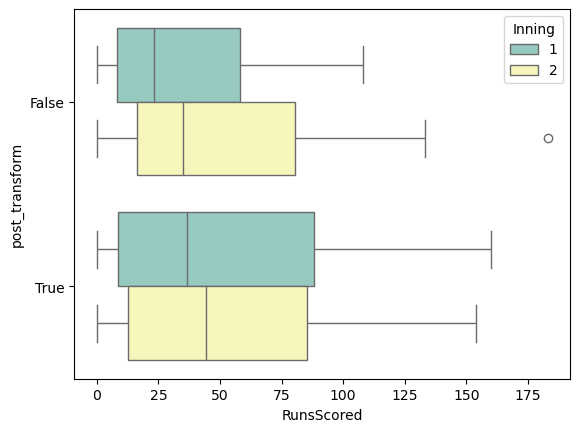

In [129]:
sns.boxplot(x = "RunsScored", y= "post_transform", hue = 'Inning', data = mydata, orient = 'h', palette = 'Set3')
plt.show()

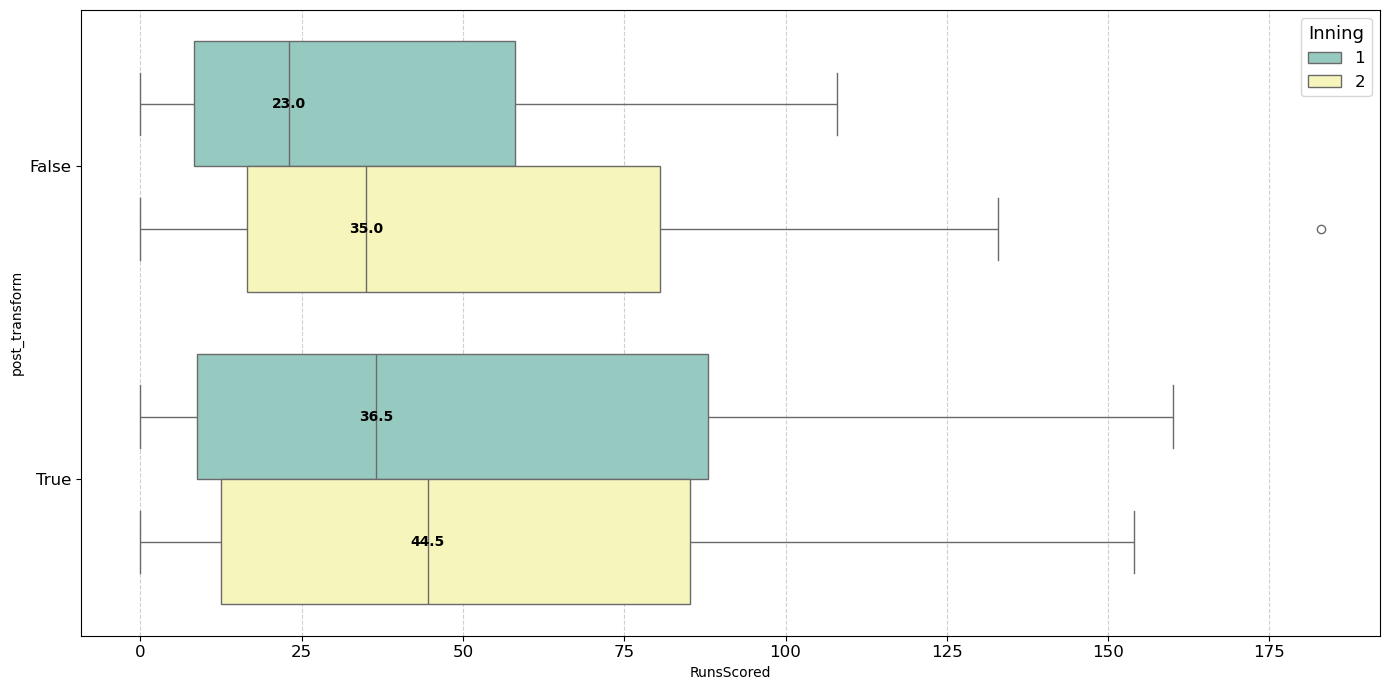

In [130]:
plt.figure(figsize = (14, 7))

sns.boxplot(x = "RunsScored", y= "post_transform", hue = 'Inning', data = mydata, orient = 'h', palette = 'Set3')

plt.grid(True, axis = 'x', linestyle = '--', alpha = 0.6)

plt.legend(title = 'Inning', title_fontsize = '13', fontsize = '12', loc = 'upper right')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Calculates median "RunsScored" for each combination of "post_transform" and "Inning"
medians = mydata.groupby(['post_transform', 'Inning'])['RunsScored'].median().unstack()

# Adds text labels for medians on the plot
for index, (p_transform, row) in enumerate(medians.iterrows()):  # Iterates over each row of medians
    for i, inning_median in enumerate(row): # Iterates over medians for each inning within the row
        if not pd.isna(inning_median): # Checks if the median value is not NaN
            plt.text(inning_median, index -0.2 + i * 0.4, f'{inning_median:.1f}',horizontalalignment = 'center', verticalalignment = 'center', fontweight = 'bold', color = 'black')
            # Places the median value as text on the plot for each box, adjusting position by inning

plt.tight_layout() # Adjusts subplot parameters to give padding, avoiding overlapping elements

plt.show()

## Use a Boxplot to compare the Balls Faced before and after transformation with Hue as innings(innings wise)


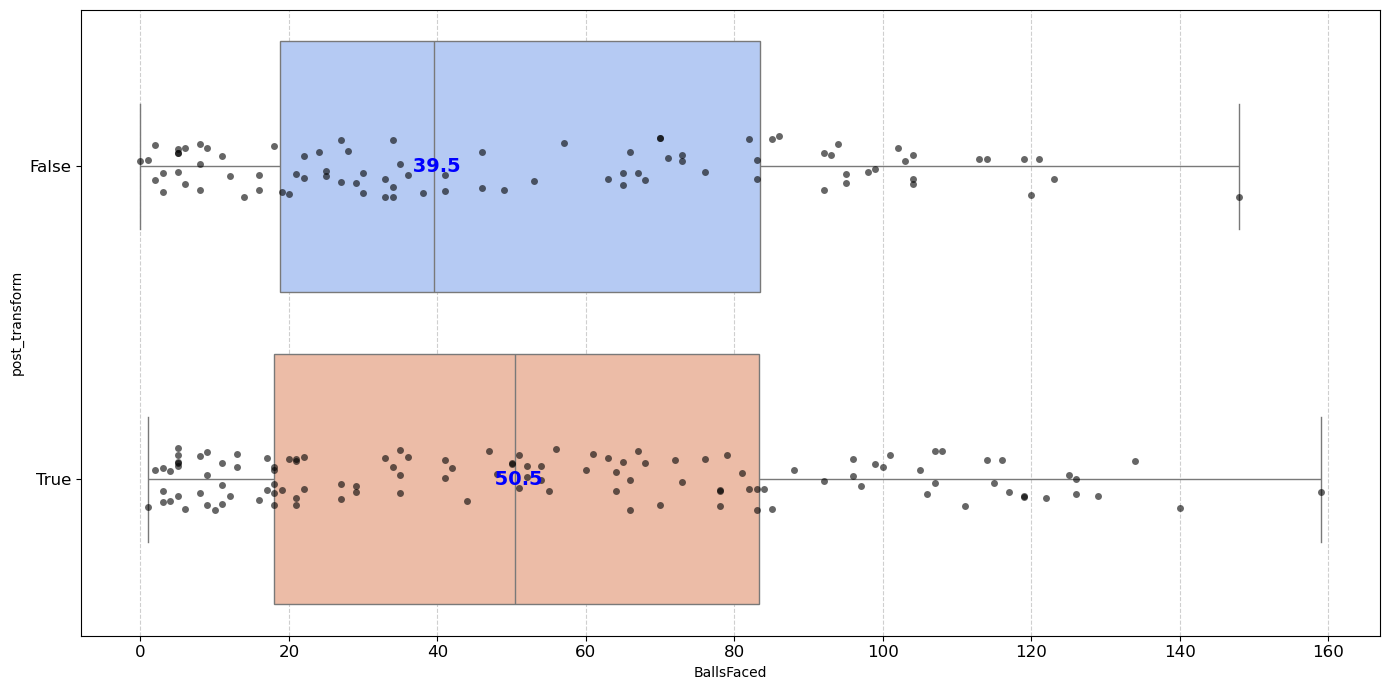

In [132]:
plt.figure(figsize = (14, 7))

sns.boxplot(x = "BallsFaced", y= "post_transform", data = mydata, orient = 'h', palette = 'coolwarm')

sns.stripplot(x = "BallsFaced", y= "post_transform", data = mydata, orient = 'h', color  = 'black', alpha = 0.6)

plt.grid(True, axis = 'x', linestyle = '--', alpha = 0.6)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

medians = mydata.groupby(['post_transform'])['BallsFaced'].median()

for index, median in enumerate(medians):
    plt.text(median, index, f'{median: .1f}', horizontalalignment = 'center', verticalalignment = 'center', fontsize = '14', fontweight = 'bold', color = 'blue')

plt.tight_layout()

plt.show()

## Use a bar plot to compare the dismissal patterns before and after transformation.
[Hint: Bar Plot]

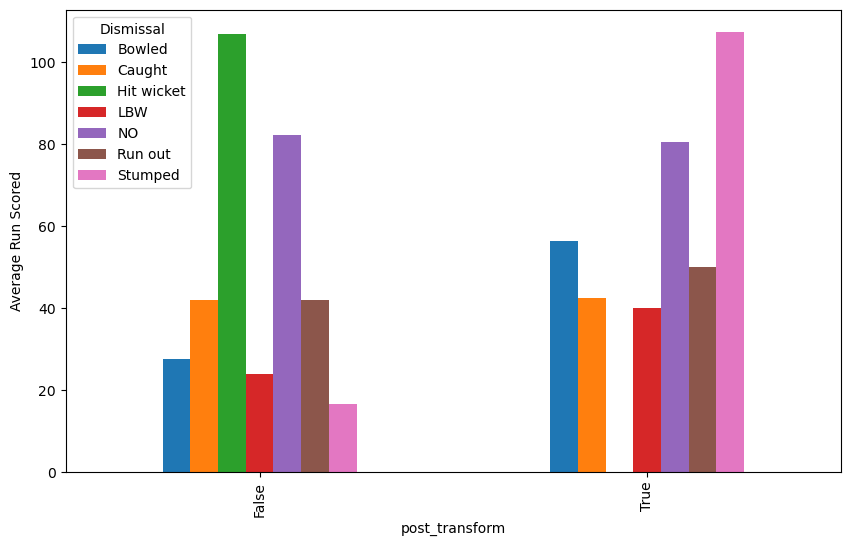

In [143]:
ct = pd.crosstab(index = mydata['post_transform'], 
            columns = mydata['Dismissal'],
           values = mydata['RunsScored'],
           aggfunc = 'mean')

ct.plot.bar(figsize = (10, 6))
plt.ylabel("Average Run Scored")

plt.show()

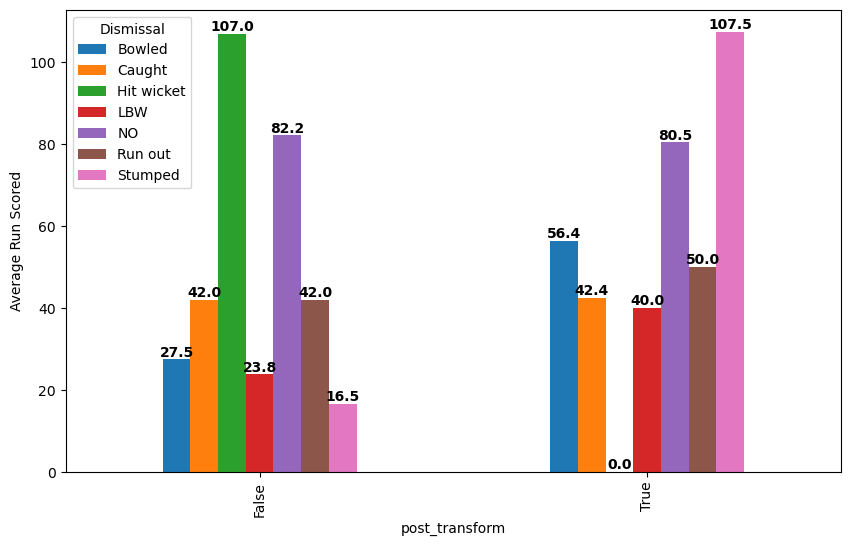

In [151]:
ct = pd.crosstab(index = mydata['post_transform'], 
            columns = mydata['Dismissal'],
           values = mydata['RunsScored'],
           aggfunc= 'mean')

ax = ct.plot.bar(figsize = (10, 6))
plt.ylabel("Average Run Scored")


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2, p.get_height()),
               ha = 'center', va = 'bottom', fontsize = 10, fontweight = 'bold', color = 'black')

plt.show()

In [153]:
mydata.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year,post_transform
0,12,22,2,LBW,1,Sri Lanka,2008,False
1,37,67,2,Caught,2,Sri Lanka,2008,False
2,25,38,1,Run out,1,Sri Lanka,2008,False
3,54,66,1,Bowled,1,Sri Lanka,2008,False
4,31,46,1,LBW,2,Sri Lanka,2008,False


## Use Pointplot to Visualize Yearly trend in run scored by Virat Kohli
[Hint: pointplot]

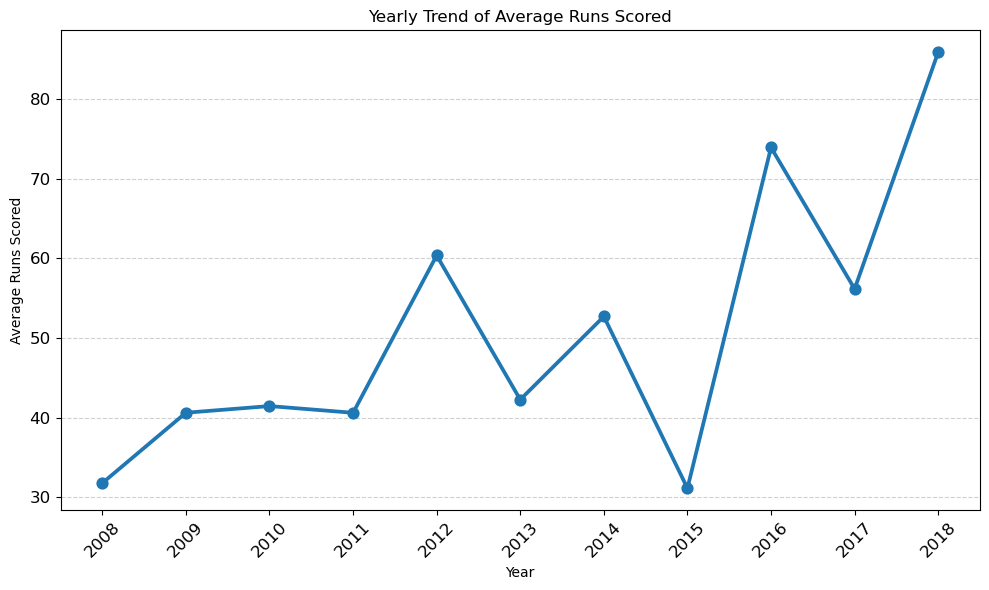

In [137]:
yearly_data = mydata.groupby('Year')['RunsScored'].mean().reset_index()

plt.figure(figsize = (10, 6))

sns.pointplot(x = 'Year', y = 'RunsScored', data = yearly_data)

plt.title("Yearly Trend of Average Runs Scored")
plt.xlabel('Year')
plt.ylabel('Average Runs Scored')

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid(True, axis = 'y', linestyle = '--', alpha = 0.6)

plt.tight_layout()
plt.show()

Inference: 

Highest avg runs scored in the year -> 2018
Lowest avg runs scored in the year -> 2015

## Can we say there is a  linear relationship between RunsScored & BallsFaced over different batting positions?
[Hint: Use LMplot]

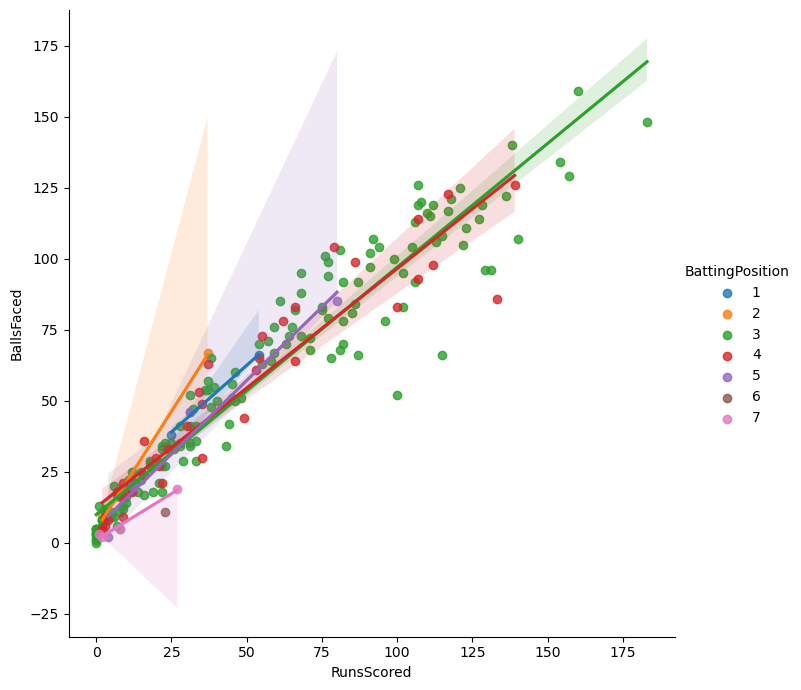

In [155]:
sns.lmplot(x = 'RunsScored', y = 'BallsFaced', hue = 'BattingPosition', data = mydata, height = 7)
plt.show()

## How the batting position has changed with different oppositions yearly?
[Hint: FacetGrid]

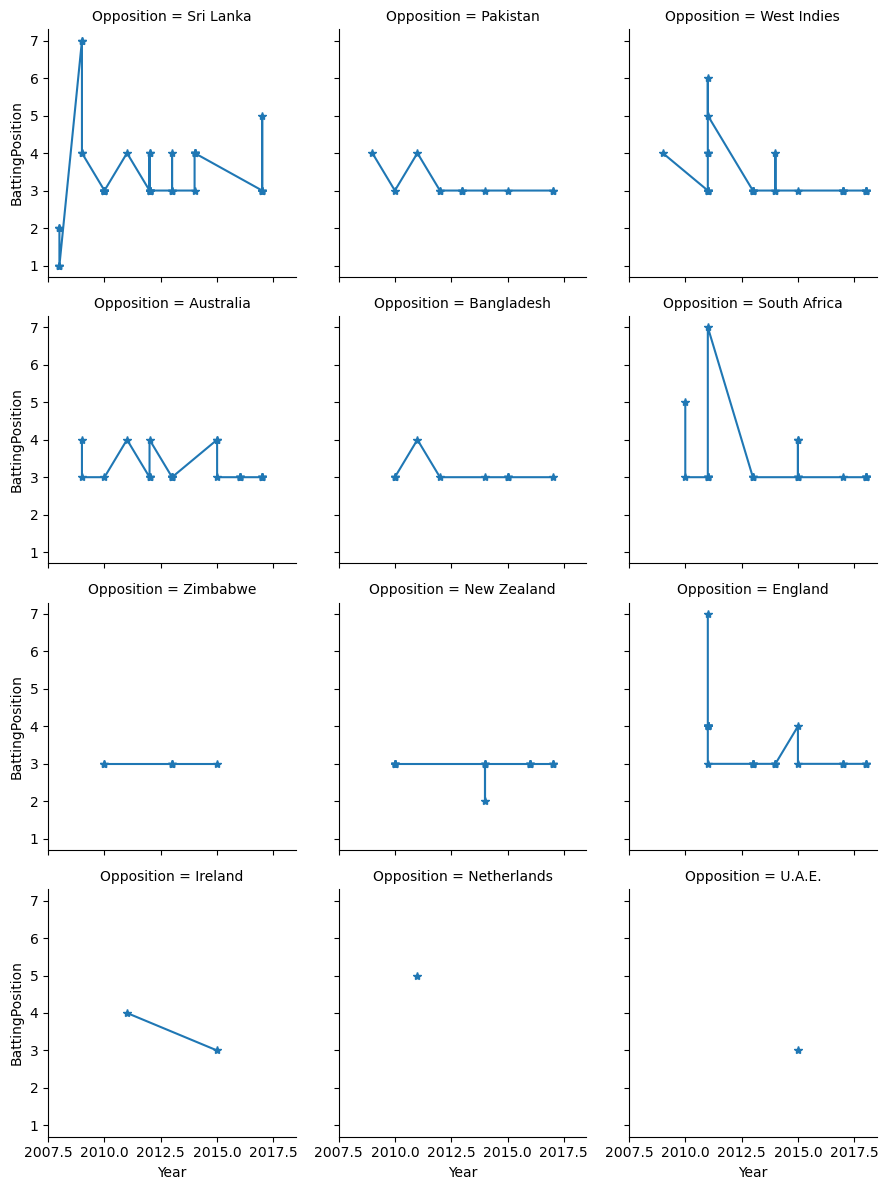

In [157]:
g = sns.FacetGrid(mydata, col = 'Opposition', col_wrap = 3, height = 3)

g = g.map(plt.plot, "Year", "BattingPosition", marker = '*')

plt.show()

SEE YOU IN THE NEXT ANALYSIS...